In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [10]:
data=pd.read_csv("../artifact/sentiment_analysis.csv")

In [11]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [6]:
##Data Preprocessing

In [12]:
data.shape

(7920, 3)

In [13]:
data.duplicated().sum()

np.int64(0)

In [14]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [14]:
##Text pre-processing

In [15]:
import re
import string


###
Converting to lowercase

In [16]:
data["tweet"]=data["tweet"].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [17]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...



Remove links

In [18]:
import re

data["tweet"] = data["tweet"].apply(lambda x: re.sub(r'http\S+|www\S+', ' ', x))


In [19]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #pregnancy test #android #apps ...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


In [20]:
data['tweet']=data["tweet"].apply(lambda x: re.sub(r"[^\w\s]"," ",x))

In [21]:
data["tweet"]

0        fingerprint  pregnancy test    android  apps ...
1       finally a transparant silicon case    thanks t...
2       we love this  would you go   talk  makememorie...
3       i m wired i know i m george i was made that wa...
4       what amazing service  apple won t even talk to...
                              ...                        
7915    live out loud  lol  liveoutloud  selfie  smile...
7916    we would like to wish you an amazing day  make...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my  smart  pocket  wifi stay conne...
7919    apple barcelona     apple  store  bcn  barcelo...
Name: tweet, Length: 7920, dtype: object

In [22]:
data.tail(10)

,id,label,tweet
7910,7911,0,perfect match instagood applewatch red ins...
7911,7912,0,i am completely in love with the new iphone em...
7912,7913,0,tune in turn on drop out gtd in one app ...
7913,7914,1,ok so my galaxy crashed after one day now i ha...
7914,7915,0,gain followers rt this must follow me i follow...
7915,7916,0,live out loud lol liveoutloud selfie smile...
7916,7917,0,we would like to wish you an amazing day make...
7917,7918,0,helping my lovely 90 year old neighbor with he...
7918,7919,0,finally got my smart pocket wifi stay conne...
7919,7920,0,apple barcelona apple store bcn barcelo...


In [23]:
data["tweet"]=data["tweet"].str.replace(r'\d+','',regex=True)

In [24]:
data.tail(5)

,id,label,tweet
7915,7916,0,live out loud lol liveoutloud selfie smile...
7916,7917,0,we would like to wish you an amazing day make...
7917,7918,0,helping my lovely year old neighbor with her ...
7918,7919,0,finally got my smart pocket wifi stay conne...
7919,7920,0,apple barcelona apple store bcn barcelo...


In [50]:
!pip install nltk

  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/60/90/81ac364ef94209c100e12579629dc92bf7a709a84af32f8c551b02c07e94/nltk-3.9.2-py3-none-any.whl.metadata
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/db/d3/9dcc0f5797f070ec8edf30fbadfb200e71d9db6b84d211e3b2085a7589a0/click-8.3.0-py3-none-any.whl.metadata
  Using cached click-8.3.0-py3-none-any.whl.metadata (2.6 kB)
  Obtaining dependency information for joblib from https://files.pythonhosted.org/packages/1e/e8/685f47e0d754320684db4425a0967f7d3fa70126bffd76110b7009a0090f/joblib-1.5.2-py3-none-any.whl.metadata
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/e0/f5/4a7770c9a522e7d2dc1fa3ffc83ab2ab33b0b22b447e62cffef186805302/regex-2025.9.18-cp312-cp312-win_amd64.whl.metadata
  Using cached regex-2025.9.18-cp312-cp312-win_amd64.whl.metadata (41 kB


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Remove Stopwords

In [25]:
import nltk
nltk.download('stopwords',download_dir='../Static/model/')

[nltk_data] Downloading package stopwords to ../Static/model/...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [26]:
with open('../Static/model/corpora/stopwords/english','r') as file:
    sw=file.read().splitlines()

In [27]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [28]:
data["tweet"]=data['tweet'].apply(lambda x: ' '.join(x for x in x.split() if x not in sw))

In [107]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,wired know george made way iphone cute daventr...
4,5,1,amazing service apple even talk question unles...


Stemming

In [29]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [30]:
data["tweet"]=data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [123]:
data.head(10)

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,wire know georg wa made way iphon cute daventr...
4,5,1,amaz servic appl even talk question unless pay...
5,6,1,iphon softwar updat fuck phone big time stupid...
6,7,0,happi us instap instadaili u soni xperia xperiaz
7,8,0,new type c charger cabl uk bay amazon etsi new...
8,9,0,bout go shop listen music iphon justm music li...
9,10,0,photo fun selfi pool water soni camera picofth...


Buiding vocabulary

In [31]:
from collections import Counter
vocab=Counter()

In [32]:
for sentence in data["tweet"]:
    vocab.update(sentence.split())

print(vocab)

Counter({'iphon': 4190, 'appl': 2925, 'samsung': 1428, 'new': 1147, 'twitter': 1115, 'com': 1044, 'phone': 1039, 'follow': 896, 'soni': 852, 'pic': 610, 'ipad': 541, 'rt': 535, 'love': 507, 'like': 465, 'day': 440, 'app': 420, 'android': 418, 'life': 416, 'photo': 397, 'io': 393, 'get': 384, 'instagram': 371, 'galaxi': 371, 'case': 354, 'beauti': 332, 'cute': 331, 'work': 314, 'today': 314, 'gain': 312, 'happi': 302, 'back': 298, 'photographi': 295, 'fuck': 294, 'game': 287, 'fun': 282, 'got': 280, 'thank': 268, 'music': 268, 'news': 265, 'time': 252, 'instagood': 251, 'make': 247, 'updat': 241, 'smile': 241, 'girl': 225, 'funni': 224, 'one': 223, 'lol': 220, 'fashion': 219, 'itun': 214, 'go': 211, 'ipod': 211, 'birthday': 209, 'tech': 207, 'iphonex': 200, 'final': 199, 'friend': 197, 'ps': 197, 'photooftheday': 195, 'everyon': 189, 'amaz': 183, 'good': 183, 'use': 176, 'look': 172, 'note': 171, 'fail': 170, 'selfi': 168, 'must': 168, 'mac': 168, 'want': 166, 'gift': 165, 'sougofollow'

In [131]:
len(vocab)

15222

In [132]:
data.shape

(7920, 3)

In [33]:
tokens =[key for key in vocab if vocab[key]>10]
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'pic',
 'twitter',
 'com',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',


In [137]:
len(tokens)

2729

In [34]:
def save_vocabulary(lines,filename):
    data='\n'.join(lines)
    file=open(filename,'w',encoding='utf-8')
    file.write(data)
    file.close()
save_vocabulary(tokens,'../Static/model/vocabulary.txt')

Divide Data Set

In [35]:
X=data["tweet"]
y=data["label"]

In [142]:
X

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       wire know georg wa made way iphon cute daventr...
4       amaz servic appl even talk question unless pay...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad thi morn ha m...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [144]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [150]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/c6/99/ed35197a158f1fdc2fe7c3680e9c70d0128f662e1fee4ed495f4b5e13db0/scikit_learn-1.7.2-cp312-cp312-win_amd64.whl.metadata
  Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for scipy>=1.8.0 from https://files.pythonhosted.org/packages/34/95/20e02ca66fb495a95fba0642fd48e0c390d0ece9b9b14c6e931a60a12dea/scipy-1.16.2-cp312-cp312-win_amd64.whl.metadata
  Using cached scipy-1.16.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl (8.7 MB)
Using cached scipy-1.16.2-cp312-cp312-win_amd64.whl (38.6 MB)
Using 


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [156]:
X_train.shape

(6336,)

In [157]:
X_test.shape

(1584,)

In [158]:
y_test

4896    0
7539    1
1677    0
1964    0
3025    0
       ..
1419    0
3939    0
7834    1
5137    1
4434    0
Name: label, Length: 1584, dtype: int64

In [159]:
y_train

4252    0
4428    0
7374    1
1410    0
7896    1
       ..
5226    0
5390    1
860     0
7603    0
7270    1
Name: label, Length: 6336, dtype: int64

In [ ]:
X_train

Vectorization 

In [40]:
def vectorization(ds,vocabulary):
    vectorized_list=[]
    for sentence in ds:
        sent_list=np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sent_list[i]=1

        vectorized_list.append(sent_list)
        
    return np.asarray(vectorized_list)
    
    

In [41]:
vectorized_X_train=vectorization(X_train,tokens)

In [42]:
for i in vectorized_X_train:
   print(i)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 1. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0.

In [43]:
vectorized_X_test=vectorization(X_test,tokens)

In [44]:
y_train

4252    0
4428    0
7374    1
1410    0
7896    1
       ..
5226    0
5390    1
860     0
7603    0
7270    1
Name: label, Length: 6336, dtype: int64

In [45]:
y_test

4896    0
7539    1
1677    0
1964    0
3025    0
       ..
1419    0
3939    0
7834    1
5137    1
4434    0
Name: label, Length: 1584, dtype: int64

In [46]:
vectorized_x_test=vectorization(X_test,tokens)

In [205]:
print(vectorized_x_test[0])

[0. 0. 0. ... 0. 0. 0.]


In [47]:
y_train.value_counts()

label
0    4742
1    1594
Name: count, dtype: int64

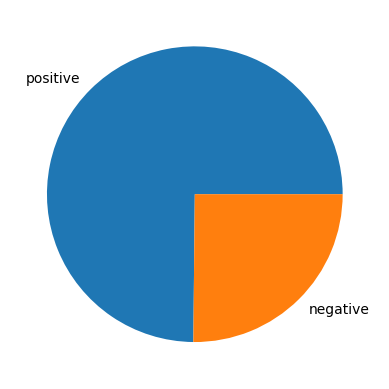

In [48]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels=["positive","negative"])
plt.show()

In [197]:
!pip install imbalanced-learn 

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/65/60/103dc71019ec2fa987f42f9dbe88641a74edc57f8499fac8896955b66065/imbalanced_learn-0.14.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/240.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/240.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/240.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/240.0 kB ? eta -:--:--
   --- ----------------------------------- 20.5/240.0 kB 131.3 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/240.0 kB 196.9 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/240.0 kB 196.9 kB/s eta 0:00:02
   -------------- ------------------------ 92.2/240.0 kB 327.7 kB/s eta 0:00:01
   ---------------------- --------------- 143.4/240.0 kB 473.7 kB/s eta 0:00:01
   -------------------------------------- 240.0/240.0 kB 667.8 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Handle inbalance dataset

In [49]:
from imblearn.over_sampling import SMOTE 
smote=SMOTE()
vectorized_x_train_smoted,y_train_smoted=smote.fit_resample(vectorized_X_train,y_train)
print()

In [50]:
print(vectorized_x_train_smoted.shape,y_train_smoted.shape)

(9484, 1157) (9484,)


In [51]:
y_train_smoted.value_counts()

label
0    4742
1    4742
Name: count, dtype: int64

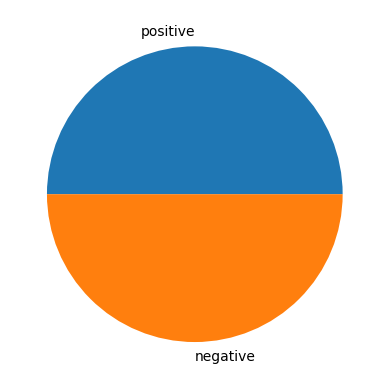

In [52]:
plt.pie(np.array([y_train_smoted.value_counts()[0],y_train_smoted.value_counts()[1]]),labels=["positive","negative"])
plt.show()

In [53]:
y_train_smoted,vectorized_x_train_smoted,vectorized_x_test,y_test

(0       0
 1       0
 2       1
 3       0
 4       1
        ..
 9479    1
 9480    1
 9481    1
 9482    1
 9483    1
 Name: label, Length: 9484, dtype: int64,
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(9484, 1157)),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1157)),
 4896    0
 7539    1
 1677    0
 1964    0
 3025    0
        ..
 1419    0
 3939    0
 7834    1
 5137    1
 4434    0
 Name: label, Length: 1584, dtype: int64)

Model Training and Evaluation


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [55]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

Logistic Regression

In [56]:
LR=LogisticRegression()
LR.fit(vectorized_x_train_smoted,y_train_smoted)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [57]:
y_train_pred=LR.predict(vectorized_x_train_smoted)

In [58]:
y_train_pred

array([0, 0, 1, ..., 1, 1, 1], shape=(9484,))

In [59]:
y_train_smoted

0       0
1       0
2       1
3       0
4       1
       ..
9479    1
9480    1
9481    1
9482    1
9483    1
Name: label, Length: 9484, dtype: int64

In [60]:
training_scores(y_train_smoted,y_train_pred)

Training Scores:
	Accuracy = 0.941
	Precision = 0.918
	Recall = 0.969
	F1-Score = 0.943


In [61]:
y_test_pred=LR.predict(vectorized_x_test)

In [62]:
y_test_pred

array([0, 1, 0, ..., 1, 1, 1], shape=(1584,))

In [63]:
validation_scores(y_test,y_test_pred)

Testing Scores:
	Accuracy = 0.872
	Precision = 0.726
	Recall = 0.852
	F1-Score = 0.784


In [64]:
NB=MultinomialNB()
NB.fit(vectorized_x_train_smoted,y_train_smoted)
y_train_pred=NB.predict(vectorized_x_train_smoted)
training_scores(y_train_smoted,y_train_pred)
y_test_pred=NB.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.906
	Precision = 0.872
	Recall = 0.952
	F1-Score = 0.911
Testing Scores:
	Accuracy = 0.884
	Precision = 0.73
	Recall = 0.914
	F1-Score = 0.812


In [66]:
DT=DecisionTreeClassifier()
DT.fit(vectorized_x_train_smoted,y_train_smoted)
y_train_pred=DT.predict(vectorized_x_train_smoted)
training_scores(y_train_smoted,y_train_pred)
y_test_pred=DT.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.82
	Precision = 0.693
	Recall = 0.611
	F1-Score = 0.649


In [67]:
RF=RandomForestClassifier()
RF.fit(vectorized_x_train_smoted,y_train_smoted)
y_train_pred=RF.predict(vectorized_x_train_smoted)
training_scores(y_train_smoted,y_train_pred)
y_test_pred=RF.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.875
	Precision = 0.818
	Recall = 0.697
	F1-Score = 0.752


In [68]:
SV=SVC()
SV.fit(vectorized_x_train_smoted,y_train_smoted)
y_train_pred=SV.predict(vectorized_x_train_smoted)
training_scores(y_train_smoted,y_train_pred)
y_test_pred=SV.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.978
	Precision = 0.961
	Recall = 0.997
	F1-Score = 0.979
Testing Scores:
	Accuracy = 0.883
	Precision = 0.771
	Recall = 0.812
	F1-Score = 0.791


In [70]:
import pickle 
with open('../Static/model/model.pickle','wb')as file:
    pickle.dump(LR,file)
